# 1 - Introductory Umbrella Sampling and UWHAM Trials
*By Marcus Schwarting*

In this notebook, we will review the basic functionality of the Umbrella Sampling and UWHAM code contained within the class `uwham_umbrella.UWHAM_FreeEnergy()`. We will demonstrate the capabilities of various functions within the class to:
- Generate double or triple well potential functions and force magnitude assignments
- Carry out simple Brownian motion dynamics on a particle, which may be run to convergence
- Run umbrella sampling with proper biasing along a series of bins
- Take the potential energies resulting from the MD simulations across bins and using UWHAM to determine free energy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uwham_umbrella import *
%matplotlib inline

### Brownian Particle In A Double-Well Potential

In [130]:
kB = 1.38064852E-2 # zJ/K
T=298 #Kelvin
run_calc = UWHAM_FreeEnergy(lower_range=-2,upper_range=2,n_bins=100,\
                 well_width=1,well_height=kB*T,friction_const=0.1,temperature=T,timestep_size=1e-4)
test_time1, test_traj1, test_energy1, test_force1 = run_calc.run_brownian_sim(1000,start_pos=-0.4)
test_time2, test_traj2, test_energy2, test_force2 = run_calc.run_brownian_sim(1000,start_pos=-0.01)
test_time3, test_traj3, test_energy3, test_force3 = run_calc.run_brownian_sim(1000,start_pos=0.01)
test_time4, test_traj4, test_energy4, test_force4 = run_calc.run_brownian_sim(1000,start_pos=0.5)


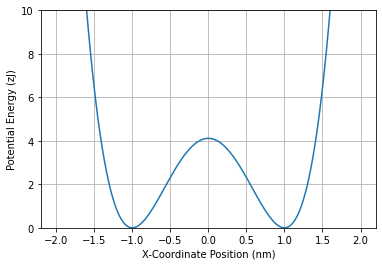

<ipython-input-131-126972f5645c>:15: RuntimeWarning: invalid value encountered in log
  t=np.log(np.log(t))


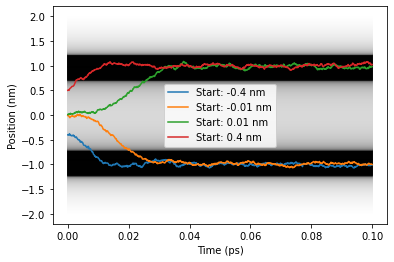

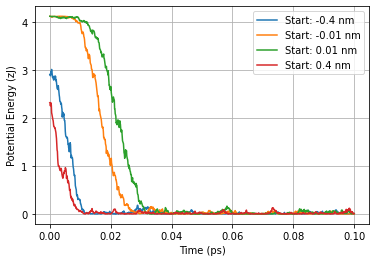

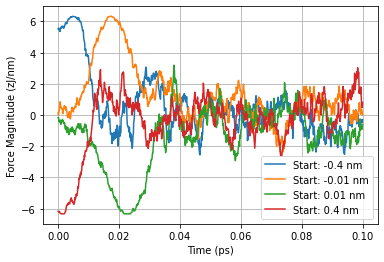

In [131]:
x_coords = np.linspace(-2,2,1000)
t = np.array([run_calc.double_well_potential(x) for x in x_coords])

plt.figure()
plt.plot(x_coords,t)
plt.ylim([0,10])
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Potential Energy (zJ)')
plt.show()


plt.figure()

t=np.log(np.log(t))
t = (t-min(t))/(max(t)-min(t))
for i in range(1000):
    plt.plot([0,0.1],[x_coords[i],x_coords[i]],color=[t[i],t[i],t[i]],alpha=0.5)


plt.plot(test_time1,test_traj1,label='Start: -0.4 nm')
plt.plot(test_time2,test_traj2,label='Start: -0.01 nm')
plt.plot(test_time3,test_traj3,label='Start: 0.01 nm')
plt.plot(test_time4,test_traj4,label='Start: 0.4 nm')
plt.legend()
plt.xlabel('Time (ps)')
plt.ylabel('Position (nm)')
plt.show()

plt.figure()
plt.plot(test_time1,test_energy1,label='Start: -0.4 nm')
plt.plot(test_time2,test_energy2,label='Start: -0.01 nm')
plt.plot(test_time3,test_energy3,label='Start: 0.01 nm')
plt.plot(test_time4,test_energy4,label='Start: 0.4 nm')
plt.legend()
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (zJ)')
plt.grid()
plt.show()

plt.figure()
plt.plot(test_time1,test_force1,label='Start: -0.4 nm')
plt.plot(test_time2,test_force2,label='Start: -0.01 nm')
plt.plot(test_time3,test_force3,label='Start: 0.01 nm')
plt.plot(test_time4,test_force4,label='Start: 0.4 nm')
plt.legend()
plt.xlabel('Time (ps)')
plt.ylabel('Force Magnitude (zJ/nm)')
plt.grid()
plt.show()


### Brownian Particle in a Triple-Well Potential

In [132]:
kB = 1.38064852E-2 # zJ/K
T=298 #Kelvin
run_calc = UWHAM_FreeEnergy(lower_range=-2,well_type='triple',upper_range=2,n_bins=100,\
                 well_width=1,well_height=kB*T,friction_const=0.1,temperature=T,timestep_size=1e-4)
test_time1, test_traj1, test_energy1, test_force1 = run_calc.run_brownian_sim(200,start_pos=-0.6)
test_time2, test_traj2, test_energy2, test_force2 = run_calc.run_brownian_sim(200,start_pos=-0.4)
test_time3, test_traj3, test_energy3, test_force3 = run_calc.run_brownian_sim(200,start_pos=0.4)
test_time4, test_traj4, test_energy4, test_force4 = run_calc.run_brownian_sim(200,start_pos=0.6)


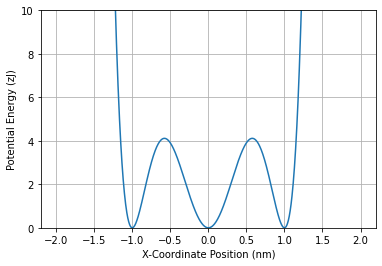

<ipython-input-134-9aaac1f81571>:13: RuntimeWarning: invalid value encountered in log
  t=np.log(np.log(t))


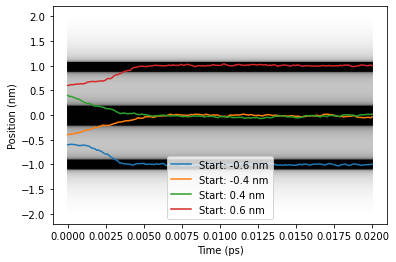

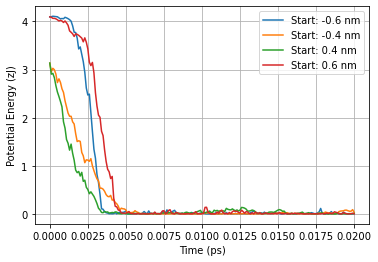

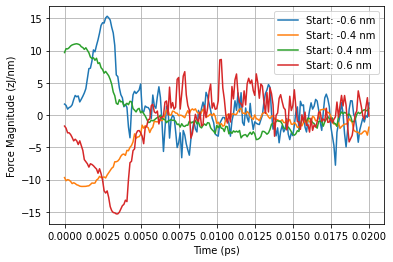

In [134]:
x_coords = np.linspace(-2,2,1000)
t = np.array([run_calc.triple_well_potential(x) for x in x_coords])
plt.figure()
plt.plot(x_coords,t)
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Potential Energy (zJ)')
plt.ylim([0,10])
plt.grid()
plt.show()

plt.figure()

t=np.log(np.log(t))
t = (t-min(t))/(max(t)-min(t))
for i in range(1000):
    plt.plot([0,0.02],[x_coords[i],x_coords[i]],color=[t[i],t[i],t[i]],alpha=0.5)


plt.plot(test_time1,test_traj1,label='Start: -0.6 nm')
plt.plot(test_time2,test_traj2,label='Start: -0.4 nm')
plt.plot(test_time3,test_traj3,label='Start: 0.4 nm')
plt.plot(test_time4,test_traj4,label='Start: 0.6 nm')
plt.xlabel('Time (ps)')
plt.ylabel('Position (nm)')
plt.legend()
plt.show()

plt.figure()
plt.plot(test_time1,test_energy1,label='Start: -0.6 nm')
plt.plot(test_time2,test_energy2,label='Start: -0.4 nm')
plt.plot(test_time3,test_energy3,label='Start: 0.4 nm')
plt.plot(test_time4,test_energy4,label='Start: 0.6 nm')
plt.legend()
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (zJ)')
plt.grid()
plt.show()

plt.figure()
plt.plot(test_time1,test_force1,label='Start: -0.6 nm')
plt.plot(test_time2,test_force2,label='Start: -0.4 nm')
plt.plot(test_time3,test_force3,label='Start: 0.4 nm')
plt.plot(test_time4,test_force4,label='Start: 0.6 nm')
plt.legend()
plt.xlabel('Time (ps)')
plt.ylabel('Force Magnitude (zJ/nm)')
plt.grid()
plt.show()


### A Visualization of Umbrella Sampling and Harmonic Biasing on Bins

In [2]:
kB = 1.38064852E-2 # zJ/K
T=298 #Kelvin
run_calc = UWHAM_FreeEnergy(lower_range=-2,well_type='double',upper_range=2,n_bins=200,\
                 well_width=1,well_height=kB*T,friction_const=0.1,temperature=T,timestep_size=1e-4)
u_times, u_trajs, u_pes, u_forces = run_calc.run_umbrella_sim_full(1000)
print(u_trajs.shape)

(200, 1001)


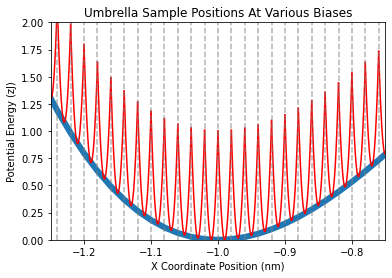

In [3]:
kB = 1.38064852E-2 # zJ/K
W=1 #Half width between the two minima of potential
#height=20.
height=1.
T = 298 #Kelvin
x_lower = -3
x_upper = 3
x_range = np.linspace(x_lower,x_upper,100)

plt.figure()
plt.plot(run_calc.x_range,[run_calc.double_well_potential(x) \
                           for x in run_calc.x_range],linewidth=6)
#for i in np.linspace(-3,3,301):
for i in run_calc.x_range:
    plt.axvline(x=i,color='gray',linestyle='--',alpha=0.6)
    x_umb = np.linspace(i+0.04,i+0.06,50)
    plt.plot(x_umb,10000*(x_umb-i-0.05)**2+\
             run_calc.double_well_potential(x_umb),color='red')
plt.xlabel('X Coordinate Position (nm)')
plt.ylabel('Potential Energy (zJ)')
plt.ylim([0,2])
plt.title('Umbrella Sample Positions At Various Biases')
plt.xlim([-1.25,-0.75])
plt.show()

### Umbrella Sampling on a Double-Well Potential

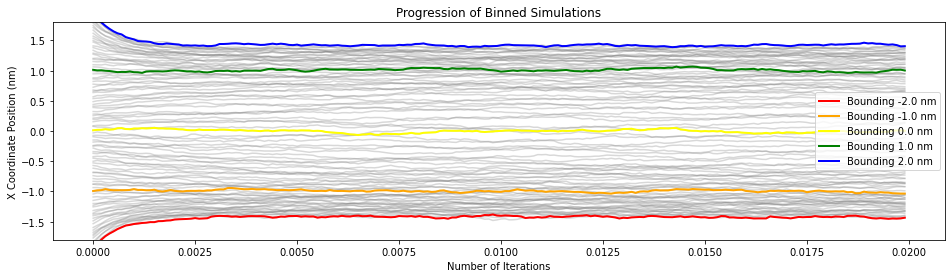

In [176]:
plt.figure(figsize=(16,4))
for i in u_trajs:
    plt.plot(u_times[:200],i[:200],alpha=0.3,color='gray')
plt.plot(u_times[:200],u_trajs[0][:200],color='red',\
         linewidth=2,label=f'Bounding {run_calc.x_range[0]} nm')
plt.plot(u_times[:200],u_trajs[25][:200],color='orange',\
         linewidth=2,label=f'Bounding {run_calc.x_range[25]} nm')
plt.plot(u_times[:200],u_trajs[50][:200],color='yellow',\
         linewidth=2,label=f'Bounding {run_calc.x_range[50]} nm')
plt.plot(u_times[:200],u_trajs[75][:200],color='green',\
         linewidth=2,label=f'Bounding {run_calc.x_range[75]} nm')
plt.plot(u_times[:200],u_trajs[-1][:200],color='blue',\
         linewidth=2,label=f'Bounding {run_calc.x_range[-1]} nm')
plt.xlabel('Number of Iterations')
plt.ylabel('X Coordinate Position (nm)')
plt.title('Progression of Binned Simulations')
plt.legend()
plt.ylim([-1.8,1.8])
plt.show()

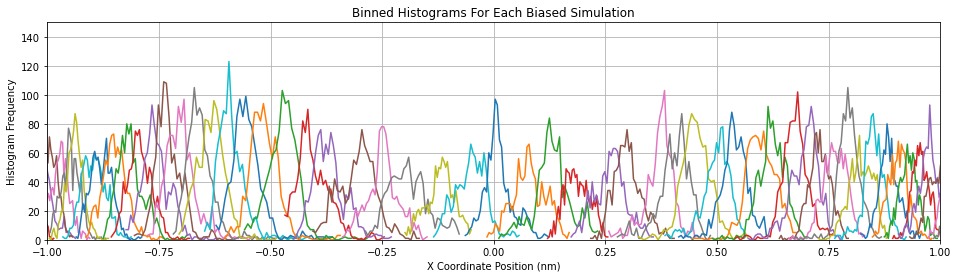

In [182]:
middle_trajs = u_trajs
sub_li = []
for i in middle_trajs:
    t = plt.hist(i,40)
    mid_locs = [(t[1][i]+t[1][i-1])/2 for i in range(1,len(t[1]))]
    plt.clf()
    sub_li.append([mid_locs,t[0]])
plt.close()
    
plt.figure(figsize=(16,4))
for i in sub_li:
    plt.plot(i[0],i[1])
plt.xlim(-1,1)
plt.ylim(0,150)
plt.xlabel('X Coordinate Position (nm)')
plt.ylabel('Histogram Frequency')
plt.grid()
plt.title('Binned Histograms For Each Biased Simulation')
plt.show()

### Umbrella Sampling on a Triple Well Potential

In [219]:
kB = 1.38064852E-2 # zJ/K
T=298 #Kelvin
run_calc = UWHAM_FreeEnergy(lower_range=-1.5,upper_range=1.5,well_type='triple',n_bins=500,\
                 well_width=1,well_height=kB*T,friction_const=0.1,temperature=T,timestep_size=1e-4)
u_times, u_trajs, u_pes, u_forces = run_calc.run_umbrella_sim_full(1000)
print(u_trajs.shape)

(500, 1001)


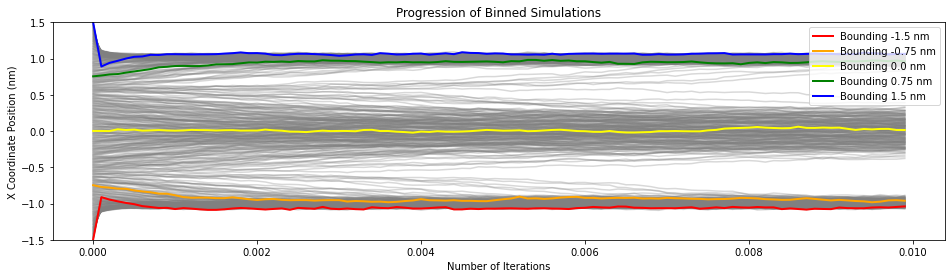

In [220]:
plt.figure(figsize=(16,4))
for i in u_trajs:
    plt.plot(u_times[:100],i[:100],alpha=0.3,color='gray')
plt.plot(u_times[:100],u_trajs[0][:100],color='red',\
         linewidth=2,label=f'Bounding {run_calc.x_range[0]} nm')
plt.plot(u_times[:100],u_trajs[125][:100],color='orange',\
         linewidth=2,label=f'Bounding {run_calc.x_range[125]} nm')
plt.plot(u_times[:100],u_trajs[250][:100],color='yellow',\
         linewidth=2,label=f'Bounding {run_calc.x_range[250]} nm')
plt.plot(u_times[:100],u_trajs[375][:100],color='green',\
         linewidth=2,label=f'Bounding {run_calc.x_range[375]} nm')
plt.plot(u_times[:100],u_trajs[-1][:100],color='blue',\
         linewidth=2,label=f'Bounding {run_calc.x_range[-1]} nm')
plt.xlabel('Number of Iterations')
plt.ylabel('X Coordinate Position (nm)')
plt.title('Progression of Binned Simulations')
plt.legend()
plt.ylim([-1.5,1.5])
plt.show()

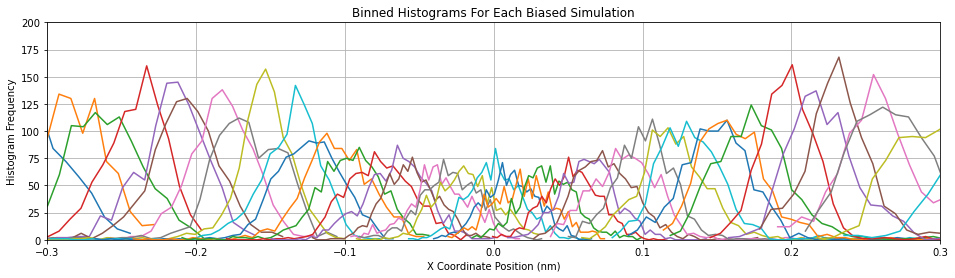

In [221]:
middle_trajs = u_trajs
sub_li = []
for i in middle_trajs:
    t = plt.hist(i,40)
    mid_locs = [(t[1][i]+t[1][i-1])/2 for i in range(1,len(t[1]))]
    plt.clf()
    sub_li.append([mid_locs,t[0]])
plt.close()
    
plt.figure(figsize=(16,4))
c = 0
for i in sub_li:
    c+=1
    if c%5==0:
        plt.plot(i[0],i[1])
plt.xlim(-0.30,0.30)
plt.ylim(0,200)
plt.xlabel('X Coordinate Position (nm)')
plt.ylabel('Histogram Frequency')
plt.grid()
plt.title('Binned Histograms For Each Biased Simulation')
plt.show()

### Computing Helmholtz Energy on a Simple Double-Well Potential

In [4]:
kB = 1.38064852E-2 # zJ/K
T=298 #Kelvin
run_calc = UWHAM_FreeEnergy(lower_range=-1.0,upper_range=1.0,well_type='double',n_bins=100,\
                 well_width=1,well_height=kB*T,friction_const=0.1,temperature=T,timestep_size=1e-4)
u_times, u_trajs, u_pes, u_forces = run_calc.run_umbrella_sim_full(1000)

In [5]:
free_energy = run_calc.helmholtz_energy(run_calc.x_range[0],run_calc.x_range[-1],print_modulus=10)

Difference to convergence (lower limit 0.1): 96.37574423900813
Difference to convergence (lower limit 0.1): 1.412403874595984
Difference to convergence (lower limit 0.1): 0.706836621308189
Difference to convergence (lower limit 0.1): 0.3345663741690058
Difference to convergence (lower limit 0.1): 0.176440111426931
Difference to convergence (lower limit 0.1): 0.10749008617207788


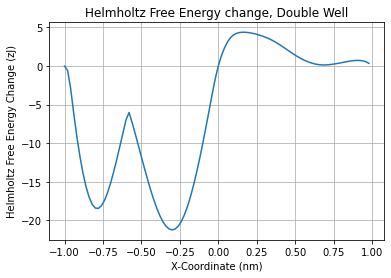

In [7]:
plt.figure()
plt.plot(run_calc.x_range[:-1],free_energy)
plt.grid()
plt.xlabel('X-Coordinate (nm)')
plt.ylabel('Helmholtz Free Energy Change (zJ)')
plt.title('Helmholtz Free Energy change, Double Well')
plt.show()